# Detail Explanation for below code
The `SingleServerQueue` class represents the single-server queuing system. It is initialized with the simulation environment (`env`), the average arrival rate of customers per unit of time (`arrival_rate`), and the average service rate of the server per unit of time (`service_rate`). The class also has attributes to keep track of the queue length (`queue_length`) and the waiting times of customers (`waiting_times`).

The `customer_arrival` method is a generator function that simulates customer arrivals. It runs indefinitely in a loop (`while True`). Inside the loop, the function `yield` pauses the execution for a random time interval based on an exponential distribution with the specified arrival rate (`random.expovariate(self.arrival_rate)`). This simulates the inter-arrival time between consecutive customers. After a customer arrives, we increment the queue length by one (`self.queue_length += 1`), and then we start the customer service process using `self.env.process(self.customer_service(self.env.now))`. The `self.env.now` captures the current simulation time, representing the time of customer arrival.

The `customer_service` method simulates the service process for a customer. It starts by capturing the arrival time passed as `arrival_time`. The service time is sampled from an exponential distribution with the specified service rate (`random.expovariate(self.service_rate)`). We then yield `self.env.timeout(service_time)`, which represents the duration of the service. After the service is completed, the departure time is captured as the current simulation time (`self.env.now`), and we calculate the waiting time as `waiting_time = departure_time - arrival_time`. We decrement the queue length by one (`self.queue_length -= 1`) and add the waiting time to the list of waiting times for customers (`self.waiting_times.append(waiting_time)`).

In the main simulation part, we define the arrival rate (`arrival_rate`), service rate (`service_rate`), and the simulation time (`simulation_time`). We then create a simulation environment (`env`) using `simpy.Environment()`.
Next, we create an instance of the `SingleServerQueue` class called `queue_system`, passing the simulation environment and the arrival and service rates to it.
We then start the customer arrival process using `env.process(queue_system.customer_arrival())`, which initiates the queuing system simulation.
The simulation runs until the specified `simulation_time` using `env.run(until=simulation_time)`.
After the simulation is complete, we calculate the average waiting time of customers using the recorded waiting times and print the result.
Finally, we plot the waiting time distribution using `matplotlib`. The histogram shows the probability density of waiting times for customers in the single-server queuing system.

Average Waiting Time: 1.6986663173127918


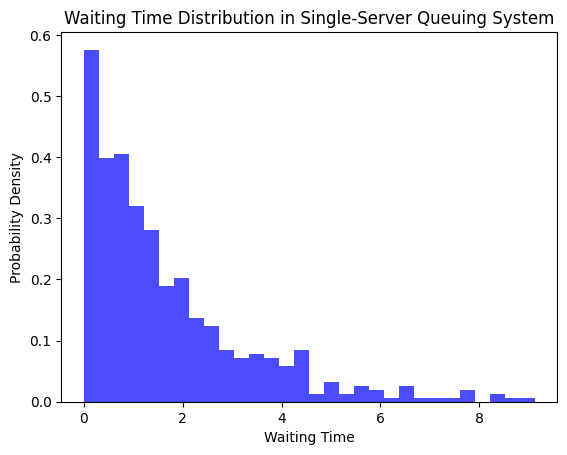

In [1]:
import simpy
import random
import matplotlib.pyplot as plt

class SingleServerQueue:
    def __init__(self, env, arrival_rate, service_rate):
        self.env = env
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.queue_length = 0
        self.waiting_times = []

    def customer_arrival(self):
        while True:
            yield self.env.timeout(random.expovariate(self.arrival_rate))
            self.queue_length += 1
            self.env.process(self.customer_service(self.env.now))  # Capture arrival time

    def customer_service(self, arrival_time):
        service_time = random.expovariate(self.service_rate)
        yield self.env.timeout(service_time)
        departure_time = self.env.now
        self.queue_length -= 1
        waiting_time = departure_time - arrival_time
        self.waiting_times.append(waiting_time)

if __name__ == '__main__':
    arrival_rate = 0.5  # Average arrival rate of customers per unit of time
    service_rate = 0.6  # Average service rate of the server per unit of time
    simulation_time = 1000

    env = simpy.Environment()
    queue_system = SingleServerQueue(env, arrival_rate, service_rate)
    env.process(queue_system.customer_arrival())
    env.run(until=simulation_time)

    # Calculate and print average waiting time
    average_waiting_time = sum(queue_system.waiting_times) / len(queue_system.waiting_times)
    print("Average Waiting Time:", average_waiting_time)

    # Plotting the waiting time distribution
    plt.hist(queue_system.waiting_times, bins=30, density=True, alpha=0.7, color='blue')
    plt.xlabel('Waiting Time')
    plt.ylabel('Probability Density')
    plt.title('Waiting Time Distribution in Single-Server Queuing System')
    plt.show()


## Alternative 2

# Detail Explanation for below code
We set the random seed for reproducibility (`RANDOM_SEED`), the simulation time (`SIM_TIME`), and the service time for the server (`SERVICE_TIME`).

The `SingleServerQueue` class represents the single-server queuing system. It is initialized with the simulation environment (`env`) and the service time of the server (`service_time`). The class uses `simpy.Resource` to create a resource representing the server with a capacity of 1 (meaning only one customer can be served at a time). The `service` method is a generator function that simulates the service process for a customer. It yields a `timeout` event based on an exponential distribution with the inverse of the service time (`1/self.service_time`), which represents the duration of the service.

The `customer_arrivals` function simulates the arrival of customers to the queuing system. It runs indefinitely in a loop (`while True`). Inside the loop, it increments the customer index `i` by one to keep track of the number of arriving customers. The function then yields a `timeout` event based on an exponential distribution with a rate of `1/5`, which represents the average time between customer arrivals. After the timeout, it starts the `customer` process, passing the simulation environment (`env`), the customer name (`f'Customer {i}'`), and the `queue` object representing the single-server queue.

The `customer` function simulates the behavior of a customer in the queuing system. When a customer arrives, it prints a message indicating the arrival time and the customer's name. It then requests to use the server using `queue.server.request()` as a context manager. If the server is available, the customer is served. It prints a message when the customer starts being served, and it yields the service process by calling `env.process(queue.service())`. The `queue.service()` generator function is called, which represents the service time of the customer. After the service is completed, the customer prints a message indicating the finish time.

In the main simulation part, we set the random seed using `random.seed(RANDOM_SEED)` for reproducibility. We create the simulation environment `env` using `simpy.Environment()`. We also create an instance of the `SingleServerQueue` class called `queue`, passing the simulation environment and the service time `SERVICE_TIME`.

Next, we start the customer arrival process using `env.process(customer_arrivals(env, queue))`. This initiates the arrival of customers to the queuing system.

The simulation runs until the specified `SIM_TIME` using `env.run(until=SIM_TIME)`. During the simulation, the arrivals and services of customers are simulated, and their interactions with the single-server queuing system are recorded and printed as messages.

The output will show the arrival, service start, and service finish times for each customer, which helps analyze the performance of the queuing system

In [8]:
import random
import simpy

RANDOM_SEED = 42
SIM_TIME = 1000
SERVICE_TIME = 5

class SingleServerQueue:
    def __init__(self, env, service_time): 
        self.server = simpy.Resource(env, capacity=1)
        self.service_time = service_time
    def service(self):
        yield env.timeout (random.expovariate(1/self.service_time))

def customer_arrivals(env, queue):
    i = 0
    while True:
        i += 1 
        yield env.timeout(random.expovariate(1/5)) 
        env.process(customer (env, f'Customer {i}', queue))

def customer(env, name, queue): 
    print (f" {env.now}: {name} arrived")
    with queue.server.request() as request:
        yield request
        print(f" {env.now}: {name} being served")
        yield env.process(queue.service())
        print(f"{env.now}: {name} finished being served")

# Setup and start the simulation 
random.seed(RANDOM_SEED)
env = simpy.Environment()
queue = SingleServerQueue(env, SERVICE_TIME) 
env.process(customer_arrivals (env, queue))
env.run(until=SIM_TIME)

 5.1003014363740045: Customer 1 arrived
 5.1003014363740045: Customer 1 being served
 5.226945631587699: Customer 2 arrived
 6.489876559938267: Customer 3 arrived
6.708421756748832: Customer 1 finished being served
 6.708421756748832: Customer 2 being served
12.354286800741797: Customer 2 finished being served
 12.354286800741797: Customer 3 being served
 13.157839923978681: Customer 4 arrived
 13.612601947011512: Customer 5 arrived
 16.352832743993968: Customer 6 arrived
 16.50408363003076: Customer 7 arrived
 17.737667109829882: Customer 8 arrived
 21.257244749160648: Customer 9 arrived
 21.391716767562187: Customer 10 arrived
 22.50017511338059: Customer 11 arrived
23.490727298498697: Customer 3 finished being served
 23.490727298498697: Customer 4 being served
27.427373569710703: Customer 4 finished being served
 27.427373569710703: Customer 5 being served
 27.747635119493452: Customer 12 arrived
28.672505664544822: Customer 5 finished being served
 28.672505664544822: Customer 6 b

## Alternative 3, 4
https://towardsdatascience.com/simulating-a-queuing-system-in-python-8a7d1151d485

https://medium.com/analytics-vidhya/simulating-a-single-server-queuing-system-in-python-f8e32578749f

### Alternative 5
From book that masud sir wants , But using random function to generates numbers uniformly between 0 and 1,

In [30]:
import math
import random

# Constants and variables initialization
Q_LIMIT = 100
BUSY = 1
IDLE = 0
next_event_type, num_custs_delayed, num_delays_required, num_events, num_in_q, server_status = 0, 0, 0, 2, 0, IDLE
area_num_in_q, area_server_status, mean_interarrival, mean_service, sim_time, total_of_delays = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
time_arrival = [0.0] * (Q_LIMIT + 1)
time_last_event, time_next_event = 0.0, [0.0] * 3

# Function to generate exponential random variates (using Python's random module)
def expon(mean):
    return -mean * math.log(random.random())

# Function to initialize simulation parameters
def initialize():
    global sim_time, server_status, num_in_q, time_last_event, num_custs_delayed, total_of_delays, area_num_in_q, area_server_status, time_next_event
    global time_last_event  # Add global declaration for time_last_event

    # Initialize simulation parameters and schedule the first arrival event
    sim_time = 0.0
    server_status = IDLE
    num_in_q = 0
    time_last_event = 0.0
    num_custs_delayed = 0
    total_of_delays = 0.0
    area_num_in_q = 0.0
    area_server_status = 0.0
    time_next_event[1] = sim_time + expon(mean_interarrival)
    time_next_event[2] = 1.0e+30

# Function to determine the next event type and update the simulation time
def timing():
    global next_event_type, sim_time
    min_time_next_event = 1.0e+29
    next_event_type = 0

    # Find the next event type with the smallest time in time_next_event
    for i in range(1, num_events + 1):
        if time_next_event[i] < min_time_next_event:
            min_time_next_event = time_next_event[i]
            next_event_type = i

    # If no event is scheduled, terminate the simulation
    if next_event_type == 0:
        print("\nEvent list empty at time", sim_time)
        exit(1)

    # Update the simulation time to the time of the next event
    sim_time = min_time_next_event

# Function to handle the arrival of a customer
def arrive():
    global num_in_q, server_status, num_custs_delayed, total_of_delays
    delay = 0.0

    # Schedule the next arrival event
    time_next_event[1] = sim_time + expon(mean_interarrival)

    # If the server is busy, the arriving customer joins the queue
    if server_status == BUSY:
        num_in_q += 1
        # Check if the queue length exceeds the limit
        if num_in_q > Q_LIMIT:
            print("\nOverflow of the array time_arrival at time", sim_time)
            exit(2)
        # Store the arrival time of the customer in the queue
        time_arrival[num_in_q] = sim_time
    else:
        # If the server is idle, the arriving customer starts service immediately
        delay = 0.0
        total_of_delays += delay
        num_custs_delayed += 1
        server_status = BUSY
        # Schedule the departure event for the current customer
        time_next_event[2] = sim_time + expon(mean_service)

# Function to handle the departure of a customer
def depart():
    global num_in_q, server_status, num_custs_delayed, total_of_delays
    delay = 0.0

    # If there are no customers in the queue, the server becomes idle and no departure event is scheduled
    if num_in_q == 0:
        server_status = IDLE
        time_next_event[2] = 1.0e+30
    else:
        # If there are customers in the queue, the first customer departs
        num_in_q -= 1
        # Calculate the delay experienced by the departing customer and update the total delays
        delay = sim_time - time_arrival[1]
        total_of_delays += delay
        num_custs_delayed += 1
        # Schedule the departure event for the next customer in the queue
        time_next_event[2] = sim_time + expon(mean_service)
        # Move the remaining customers' arrival times in the queue one position forward
        for i in range(1, num_in_q + 1):
            time_arrival[i] = time_arrival[i + 1]

# Function to generate the simulation report
def report():
    global area_num_in_q, area_server_status, num_custs_delayed, sim_time

    print("\n\nSingle-server queueing system\n")
    print("Mean interarrival time{:11.3f} minutes".format(mean_interarrival))
    print("Mean service time{:16.3f} minutes".format(mean_service))
    print("Number of customers{:14d}".format(num_delays_required))

    # Calculate and print the average delay in the queue if there are delayed customers
    if num_custs_delayed > 0:
        print("\n\nAverage delay in queue{:11.3f} minutes".format(total_of_delays / num_custs_delayed))
    else:
        print("\n\nAverage delay in queue: N/A (No customers have been delayed)")

    # Calculate and print the average number of customers in the queue and server utilization
    if sim_time > 0:
        print("Average number in queue{:10.3f}".format(area_num_in_q / sim_time))
        print("Server utilization{:15.3f}".format(area_server_status / sim_time))
        print("Time simulation ended{:12.3f} minutes".format(sim_time))
    else:
        # If simulation has not started, print N/A for average number in queue, server utilization, and simulation end time
        print("Average number in queue: N/A (Simulation has not started)")
        print("Server utilization: N/A (Simulation has not started)")
        print("Time simulation ended: N/A (Simulation has not started)")

# Function to update time-average statistics during the simulation
def update_time_avg_stats():
    global area_num_in_q, area_server_status, time_last_event  # Add global declaration for time_last_event
    time_since_last_event = sim_time - time_last_event
    time_last_event = sim_time
    # Update the area for the number of customers in the queue and the server status based on the time since the last event
    area_num_in_q += num_in_q * time_since_last_event
    area_server_status += server_status * time_since_last_event

# Main function to run the simulation
def main():
    global num_custs_delayed, outfile

    # Input parameters (You can change these values as desired)
    global mean_interarrival, mean_service, num_delays_required
    mean_interarrival = 1.0      # 5.0
    mean_service = 0.5       # 2.0
    num_delays_required = 1000

    # Initialize the simulation
    initialize()

    # Run the simulation while more delays are still needed
    while num_custs_delayed < num_delays_required:
        timing()
        update_time_avg_stats()
        if next_event_type == 1:
            arrive()
        elif next_event_type == 2:
            depart()

    # Generate the report and close the output file
    report()

if __name__ == "__main__":
    main()




Single-server queueing system

Mean interarrival time      1.000 minutes
Mean service time           0.500 minutes
Number of customers          1000


Average delay in queue      0.396 minutes
Average number in queue     0.395
Server utilization          0.485
Time simulation ended    1002.345 minutes


### Alternative 6
From book that masud sir wants, it generate exponentially distributed random numbers

In [25]:
import math

# Define constant values for the simulation
Q_LIMIT = 100  # Maximum number of customers allowed in the queue
BUSY = 1       # Represents that the server is busy serving a customer
IDLE = 0       # Represents that the server is idle and available for service

# Initialize variables for the simulation
next_event_type, num_custs_delayed, num_delays_required, num_events, num_in_q, server_status = 0, 0, 0, 2, 0, IDLE
area_num_in_q, area_server_status, mean_interarrival, mean_service, sim_time, total_of_delays = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
time_arrival = [0.0] * (Q_LIMIT + 1)  # Array to store arrival times of customers in the queue
time_last_event, time_next_event = 0.0, [0.0] * 3  # Variables to store the last and next event times


# Constants for random number generation
MODLUS = 2147483647
MULT1 = 24112
MULT2 = 26143
# List of random number generator seeds
zrng = [1, 1973272912, 281629770, 20006270, 1280689831, 2096730329, 1933576050,
        913566091, 246780520, 1363774876, 604901985, 1511192140, 1259851944,
        824064364, 150493284, 242708531, 75253171, 1964472944, 1202299975,
        233217322, 1911216000, 726370533, 403498145, 993232223, 1103205531,
        762430696, 1922803170, 1385516923, 76271663, 413682397, 726466604,
        336157058, 1432650381, 1120463904, 595778810, 877722890, 1046574445,
        68911991, 2088367019, 748545416, 622401386, 2122378830, 640690903,
        1774806513, 2132545692, 2079249579, 78130110, 852776735, 1187867272,
        1351423507, 1645973084, 1997049139, 922510944, 2045512870, 898585771,
        243649545, 1004818771, 773686062, 403188473, 372279877, 1901633463,
        498067494, 2087759558, 493157915, 597104727, 1530940798, 1814496276,
        536444882, 1663153658, 855503735, 67784357, 1432404475, 619691088,
        119025595, 880802310, 176192644, 1116780070, 277854671, 1366580350,
        1142483975, 2026948561, 1053920743, 786262391, 1792203830, 1494667770,
        1923011392, 1433700034, 1244184613, 1147297105, 539712780, 1545929719,
        190641742, 1645390429, 264907697, 620389253, 1502074852, 927711160,
        364849192, 2049576050, 638580085, 547070247]


# Random number generation function (lcgrand) is a random number generator 
# that generates uniform random numbers between 0 and 1.
# It is based on a linear congruential generator and uses a list of seeds (zrng) to generate random numbers.
def lcgrand(stream):
    global zrng
    zi, lowprd, hi31 = zrng[stream], 0, 0
    lowprd = (zi & 65535) * MULT1
    hi31 = (zi >> 16) * MULT1 + (lowprd >> 16)
    zi = ((lowprd & 65535) - MODLUS) + ((hi31 & 32767) << 16) + (hi31 >> 15)
    if zi < 0:
        zi += MODLUS
    lowprd = (zi & 65535) * MULT2
    hi31 = (zi >> 16) * MULT2 + (lowprd >> 16)
    zi = ((lowprd & 65535) - MODLUS) + ((hi31 & 32767) << 16) + (hi31 >> 15)
    if zi < 0:
        zi += MODLUS
    zrng[stream] = zi
    return (zi >> 7 | 1) / 16777216.0


# Random seed setting function (lcgrandst) sets the seed (zset) for a specific stream of the random number generator.
# It changes the value of a seed in the zrng list, which will affect the sequence of random numbers generated.
def lcgrandst(zset, stream):
    global zrng
    zrng[stream] = zset


# Random number getter function (lcgrandgt) retrieves the current seed value for a specific stream of the random number generator.
def lcgrandgt(stream):
    global zrng
    return zrng[stream]



# The expon function generates exponentially distributed random numbers using the inverse transform method.
# It calls the lcgrand function to get a uniform random number and then transforms it to an exponential distribution.
def expon(mean):
    return -mean * math.log(lcgrand(1))


# Function to initialize the simulation variables
def initialize():
    global sim_time, server_status, num_in_q, time_last_event, num_custs_delayed, total_of_delays, area_num_in_q, area_server_status, time_next_event
    global time_last_event  # Add global declaration for time_last_event

    # Initialize simulation time, server status, queue length, last event time, number of delayed customers, total delays, area for queue length, and area for server status
    sim_time = 0.0
    server_status = IDLE
    num_in_q = 0
    time_last_event = 0.0
    num_custs_delayed = 0
    total_of_delays = 0.0
    area_num_in_q = 0.0
    area_server_status = 0.0

    # Schedule the first arrival event and set the departure event time to a large value (effectively, no departure event yet)
    time_next_event[1] = sim_time + expon(mean_interarrival)
    time_next_event[2] = 1.0e+30

# Function to determine the next event and update simulation time
def timing():
    global next_event_type, sim_time
    min_time_next_event = 1.0e+29
    next_event_type = 0

    # Find the minimum time for the next event and identify the type of that event
    for i in range(1, num_events + 1):
        if time_next_event[i] < min_time_next_event:
            min_time_next_event = time_next_event[i]
            next_event_type = i

    # If no event is scheduled, terminate the simulation
    if next_event_type == 0:
        print("\nEvent list empty at time", sim_time)
        exit(1)

    # Update the simulation time to the time of the next event
    sim_time = min_time_next_event

# Function to handle the arrival of a customer
def arrive():
    global num_in_q, server_status, num_custs_delayed, total_of_delays
    delay = 0.0

    # Schedule the next arrival event
    time_next_event[1] = sim_time + expon(mean_interarrival)

    # If the server is busy, the arriving customer joins the queue
    if server_status == BUSY:
        num_in_q += 1
        # Check if the queue length exceeds the limit
        if num_in_q > Q_LIMIT:
            print("\nOverflow of the array time_arrival at time", sim_time)
            exit(2)
        # Store the arrival time of the customer in the queue
        time_arrival[num_in_q] = sim_time
    else:
        # If the server is idle, the arriving customer starts service immediately
        delay = 0.0
        total_of_delays += delay
        num_custs_delayed += 1
        server_status = BUSY
        # Schedule the departure event for the current customer
        time_next_event[2] = sim_time + expon(mean_service)

# Function to handle the departure of a customer
def depart():
    global num_in_q, server_status, num_custs_delayed, total_of_delays
    delay = 0.0

    # If there are no customers in the queue, the server becomes idle and no departure event is scheduled
    if num_in_q == 0:
        server_status = IDLE
        time_next_event[2] = 1.0e+30
    else:
        # If there are customers in the queue, the first customer departs
        num_in_q -= 1
        # Calculate the delay experienced by the departing customer and update the total delays
        delay = sim_time - time_arrival[1]
        total_of_delays += delay
        num_custs_delayed += 1
        # Schedule the departure event for the next customer in the queue
        time_next_event[2] = sim_time + expon(mean_service)
        # Move the remaining customers' arrival times in the queue one position forward
        for i in range(1, num_in_q + 1):
            time_arrival[i] = time_arrival[i + 1]

# Function to generate the simulation report
def report():
    global area_num_in_q, area_server_status, num_custs_delayed, sim_time

    print("\n\nSingle-server queueing system\n")
    print("Mean interarrival time{:11.3f} minutes".format(mean_interarrival))
    print("Mean service time{:16.3f} minutes".format(mean_service))
    print("Number of customers{:14d}".format(num_delays_required))

    # Calculate and print the average delay in the queue if there are delayed customers
    if num_custs_delayed > 0:
        print("\n\nAverage delay in queue{:11.3f} minutes".format(total_of_delays / num_custs_delayed))
    else:
        print("\n\nAverage delay in queue: N/A (No customers have been delayed)")

    # Calculate and print the average number of customers in the queue and server utilization
    if sim_time > 0:
        print("Average number in queue{:10.3f}".format(area_num_in_q / sim_time))
        print("Server utilization{:15.3f}".format(area_server_status / sim_time))
        print("Time simulation ended{:12.3f} minutes".format(sim_time))
    else:
        # If simulation has not started, print N/A for average number in queue, server utilization, and simulation end time
        print("Average number in queue: N/A (Simulation has not started)")
        print("Server utilization: N/A (Simulation has not started)")
        print("Time simulation ended: N/A (Simulation has not started)")

# Function to update time-average statistics during the simulation
def update_time_avg_stats():
    global area_num_in_q, area_server_status, time_last_event  # Add global declaration for time_last_event
    time_since_last_event = sim_time - time_last_event
    time_last_event = sim_time
    # Update the area for the number of customers in the queue and the server status based on the time since the last event
    area_num_in_q += num_in_q * time_since_last_event
    area_server_status += server_status * time_since_last_event

# Main function to run the simulation
def main():
    global num_custs_delayed, outfile

    # Input parameters (You can change these values as desired)
    global mean_interarrival, mean_service, num_delays_required
    mean_interarrival = 1.0     # 5.0
    mean_service = 0.5      # 2.0
    num_delays_required = 1000

    # Initialize the simulation
    initialize()

    # Run the simulation while more delays are still needed
    while num_custs_delayed < num_delays_required:
        timing()
        update_time_avg_stats()
        # Process the next event based on its type
        if next_event_type == 1:
            arrive()
        elif next_event_type == 2:
            depart()

    # Generate the report and close the output file (if any)
    report()

if __name__ == "__main__":
    main()
    # Start the simulation by calling the main function when the script is executed as the main program.




Single-server queueing system

Mean interarrival time      1.000 minutes
Mean service time           0.500 minutes
Number of customers          1000


Average delay in queue      0.430 minutes
Average number in queue     0.418
Server utilization          0.460
Time simulation ended    1027.915 minutes


### Alternative 7
From book that masud sir wants , But using random function to generates normally distributed numbers.

In [23]:
import math
import random

# Constants and variables initialization
Q_LIMIT = 100
BUSY = 1
IDLE = 0
next_event_type, num_custs_delayed, num_delays_required, num_events, num_in_q, server_status = 0, 0, 0, 2, 0, IDLE
area_num_in_q, area_server_status, mean_interarrival, mean_service, sim_time, total_of_delays = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
time_arrival = [0.0] * (Q_LIMIT + 1)
time_last_event, time_next_event = 0.0, [0.0] * 3

# Function to generate exponential random variates (using Python's random module)
# def expon(mean):
#     return -mean * math.log(random.random())

# Function to generate normally distributed random numbers (using Python's random module)
def normal_distribution(mean):
    return random.normalvariate(mu=mean)

# Function to initialize simulation parameters
def initialize():
    global sim_time, server_status, num_in_q, time_last_event, num_custs_delayed, total_of_delays, area_num_in_q, area_server_status, time_next_event
    global time_last_event  # Add global declaration for time_last_event

    # Initialize simulation parameters and schedule the first arrival event
    sim_time = 0.0
    server_status = IDLE
    num_in_q = 0
    time_last_event = 0.0
    num_custs_delayed = 0
    total_of_delays = 0.0
    area_num_in_q = 0.0
    area_server_status = 0.0
    time_next_event[1] = sim_time + normal_distribution(mean_interarrival)
    time_next_event[2] = 1.0e+30

# Function to determine the next event type and update the simulation time
def timing():
    global next_event_type, sim_time
    min_time_next_event = 1.0e+29
    next_event_type = 0

    # Find the next event type with the smallest time in time_next_event
    for i in range(1, num_events + 1):
        if time_next_event[i] < min_time_next_event:
            min_time_next_event = time_next_event[i]
            next_event_type = i

    # If no event is scheduled, terminate the simulation
    if next_event_type == 0:
        print("\nEvent list empty at time", sim_time)
        exit(1)

    # Update the simulation time to the time of the next event
    sim_time = min_time_next_event

# Function to handle the arrival of a customer
def arrive():
    global num_in_q, server_status, num_custs_delayed, total_of_delays
    delay = 0.0

    # Schedule the next arrival event
    time_next_event[1] = sim_time + normal_distribution(mean_interarrival)

    # If the server is busy, the arriving customer joins the queue
    if server_status == BUSY:
        num_in_q += 1
        # Check if the queue length exceeds the limit
        if num_in_q > Q_LIMIT:
            print("\nOverflow of the array time_arrival at time", sim_time)
            exit(2)
        # Store the arrival time of the customer in the queue
        time_arrival[num_in_q] = sim_time
    else:
        # If the server is idle, the arriving customer starts service immediately
        delay = 0.0
        total_of_delays += delay
        num_custs_delayed += 1
        server_status = BUSY
        # Schedule the departure event for the current customer
        time_next_event[2] = sim_time + normal_distribution(mean_service)

# Function to handle the departure of a customer
def depart():
    global num_in_q, server_status, num_custs_delayed, total_of_delays
    delay = 0.0

    # If there are no customers in the queue, the server becomes idle and no departure event is scheduled
    if num_in_q == 0:
        server_status = IDLE
        time_next_event[2] = 1.0e+30
    else:
        # If there are customers in the queue, the first customer departs
        num_in_q -= 1
        # Calculate the delay experienced by the departing customer and update the total delays
        delay = sim_time - time_arrival[1]
        total_of_delays += delay
        num_custs_delayed += 1
        # Schedule the departure event for the next customer in the queue
        time_next_event[2] = sim_time + normal_distribution(mean_service)
        # Move the remaining customers' arrival times in the queue one position forward
        for i in range(1, num_in_q + 1):
            time_arrival[i] = time_arrival[i + 1]

# Function to generate the simulation report
def report():
    global area_num_in_q, area_server_status, num_custs_delayed, sim_time

    print("\n\nSingle-server queueing system\n")
    print("Mean interarrival time{:11.3f} minutes".format(mean_interarrival))
    print("Mean service time{:16.3f} minutes".format(mean_service))
    print("Number of customers{:14d}".format(num_delays_required))

    # Calculate and print the average delay in the queue if there are delayed customers
    if num_custs_delayed > 0:
        print("\n\nAverage delay in queue{:11.3f} minutes".format(total_of_delays / num_custs_delayed))
    else:
        print("\n\nAverage delay in queue: N/A (No customers have been delayed)")

    # Calculate and print the average number of customers in the queue and server utilization
    if sim_time > 0:
        print("Average number in queue{:10.3f}".format(area_num_in_q / sim_time))
        print("Server utilization{:15.3f}".format(area_server_status / sim_time))
        print("Time simulation ended{:12.3f} minutes".format(sim_time))
    else:
        # If simulation has not started, print N/A for average number in queue, server utilization, and simulation end time
        print("Average number in queue: N/A (Simulation has not started)")
        print("Server utilization: N/A (Simulation has not started)")
        print("Time simulation ended: N/A (Simulation has not started)")

# Function to update time-average statistics during the simulation
def update_time_avg_stats():
    global area_num_in_q, area_server_status, time_last_event  # Add global declaration for time_last_event
    time_since_last_event = sim_time - time_last_event
    time_last_event = sim_time
    # Update the area for the number of customers in the queue and the server status based on the time since the last event
    area_num_in_q += num_in_q * time_since_last_event
    area_server_status += server_status * time_since_last_event

# Main function to run the simulation
def main():
    global num_custs_delayed, outfile

    # Input parameters (You can change these values as desired)
    global mean_interarrival, mean_service, num_delays_required
    mean_interarrival = 1.0         # 5.0
    mean_service = 0.5      # 2.0
    num_delays_required = 1000

    # Initialize the simulation
    initialize()

    # Run the simulation while more delays are still needed
    while num_custs_delayed < num_delays_required:
        timing()
        update_time_avg_stats()
        if next_event_type == 1:
            arrive()
        elif next_event_type == 2:
            depart()

    # Generate the report and close the output file
    report()

if __name__ == "__main__":
    main()




Single-server queueing system

Mean interarrival time      1.000 minutes
Mean service time           0.500 minutes
Number of customers          1000


Average delay in queue      1.350 minutes
Average number in queue     1.339
Server utilization          0.556
Time simulation ended    1009.259 minutes
